##### Wolfe projection method workflow steps
* load matrix data.
* partition data for Wolfe projection.
* solver using Wolfe projection and CVXOPT.
* analyze results and visualization.


Note: to check results for only a single matrix Single Block of code will be run and to check the results for all the matrix main.py will be called.

#### Imports modules

In [1]:
# import dependencies moduls
import numpy as np
from utils import Initialization, partition_indices
from solver import WolfeProjectionMethod, CVXOPT_Solver
from analysis import test_sensitivity_to_tolerance,test_sensitivity_to_partition
from visualization import plot_tolerance_sensitivity,plot_partition_sensitivity,plot_convergence,plot_convergence_compariosn
import os

In [2]:
# setting the folder path
folder_path ="E:\GitHub\\Nazifa_Mosharrat_CM_Project\\CMProject\\matrix\\"   


## Single Matrix

#### Initialization 

In [3]:
file_name = "bcsstm06.mat"
path = os.path.join(folder_path, file_name)

In [4]:
Q, q, n = Initialization(path)
print(f"Loaded Matrix: {file_name}, Shape: {Q.shape}")

Loaded Matrix: bcsstm06.mat, Shape: (420, 420)


In [5]:
# partitions
Isets = partition_indices(n)
print(f"Partitioned indices into {len(Isets)} subsets.")

Partitioned indices into 20 subsets.


#### Calling Wolfe method solver

converged at iteration 455 with relative gap: 9.034313e-14
Wolfe Projection Solution: f* = 5.4616


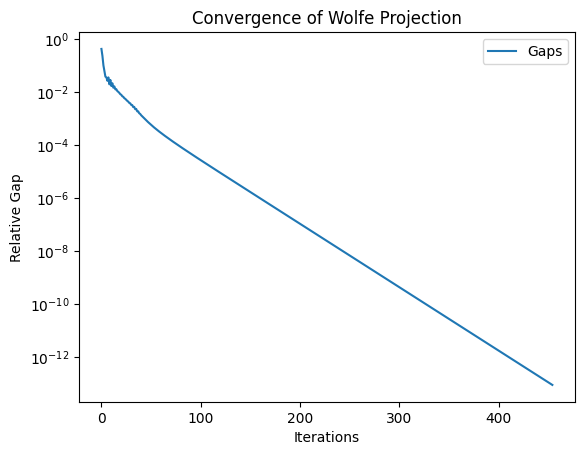

In [6]:
# solve using Wolfe
max_iters = 500
tol = 1e-9
exact_solution, exact_gap, exact_time, exact_iters, exact_opt = WolfeProjectionMethod(Q, q, Isets, max_iters, tol)
print(f"Wolfe Projection Solution: f* = {exact_opt:.4f}")
#convergence plot
plot_convergence([exact_gap],exact_iters, "Convergence of Wolfe Projection")

#### Calling CVXOPT solver

In [7]:
# using CVXOPT
x_ref, f_opt, cvx_solver_time,cvx_gap  = CVXOPT_Solver(Q, q,max_iters,tol)
print(f"CVXOPT Solution: f* = {f_opt:.4f}") 


converged at iteration 2 with relative gap: 0.000000e+00
CVXOPT Solution: f* = -2.4097


#### Comparison details between Wolfe and CVXOPT Solver

CVXOPT Solver Time: 3.5785 s, f* = -2.4097e+00
wolfe Time: 0.5138 s, f* = 5.4616e+00
relative gap wolfe without format: 9.034312596617746e-14
relative gap cvxopt without format: 0.0


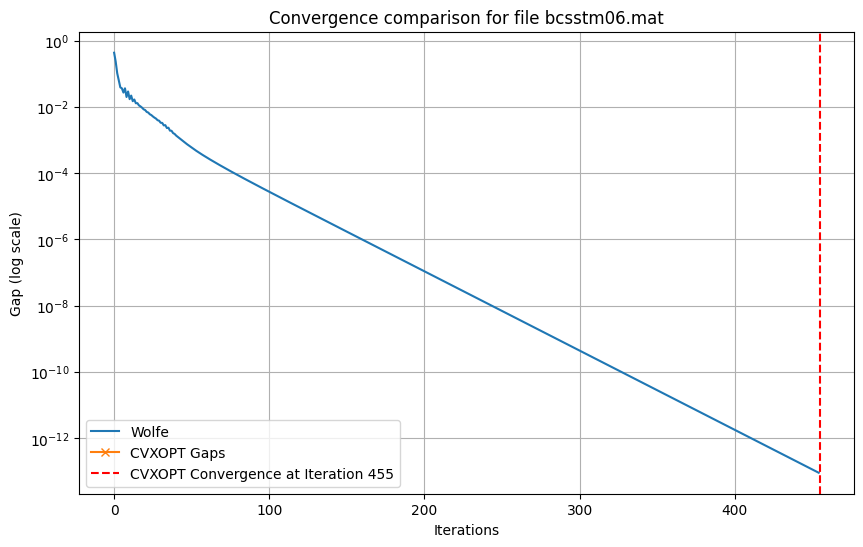

In [8]:
# detail compariosn 
print(f"CVXOPT Solver Time: {cvx_solver_time:.4f} s, f* = {f_opt:.4e}")
print(f"wolfe Time: {exact_time:.4f} s, f* = {exact_opt:.4e}")   
print(f"relative gap wolfe without format: {float(exact_gap[-1])}")
print(f"relative gap cvxopt without format: {float(cvx_gap[-1])}")
#visualize convergence comparison
plot_convergence_compariosn(exact_gap,cvx_gap,"Convergence comparison for file "+file_name);

#### Sensitivity Test over tolerance 

converged at iteration 167 with relative gap: 8.983363e-08
converged at iteration 158 with relative gap: 8.418765e-09
converged at iteration 207 with relative gap: 8.653410e-10
converged at iteration 368 with relative gap: 8.787626e-11
converged at iteration 269 with relative gap: 8.457236e-12


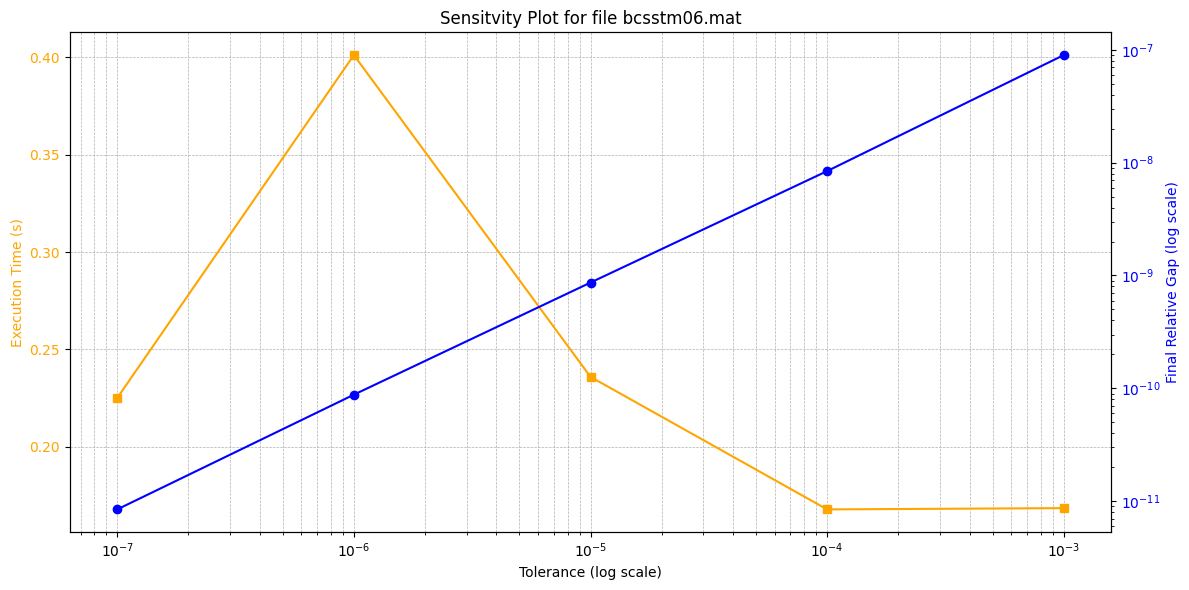

In [9]:
# Sensitivity Analysis
tolerances = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
tolerance_results = test_sensitivity_to_tolerance(Q, q, max_iters=500, tolerance_values=tolerances)
execution_times = [res['execution_time'] for res in tolerance_results]
gaps = [res['exact_gap'][-1] for res in tolerance_results]
plot_tolerance_sensitivity(tolerances,execution_times,gaps,f"Sensitvity Plot for file {file_name}")

#### Sensitivity test over partitions

converged at iteration 18 with relative gap: 1.925406e-12
converged at iteration 53 with relative gap: 8.486789e-13
converged at iteration 115 with relative gap: 4.112928e-13
converged at iteration 155 with relative gap: 2.128827e-13
converged at iteration 217 with relative gap: 1.061838e-13
converged at iteration 406 with relative gap: 8.673156e-14


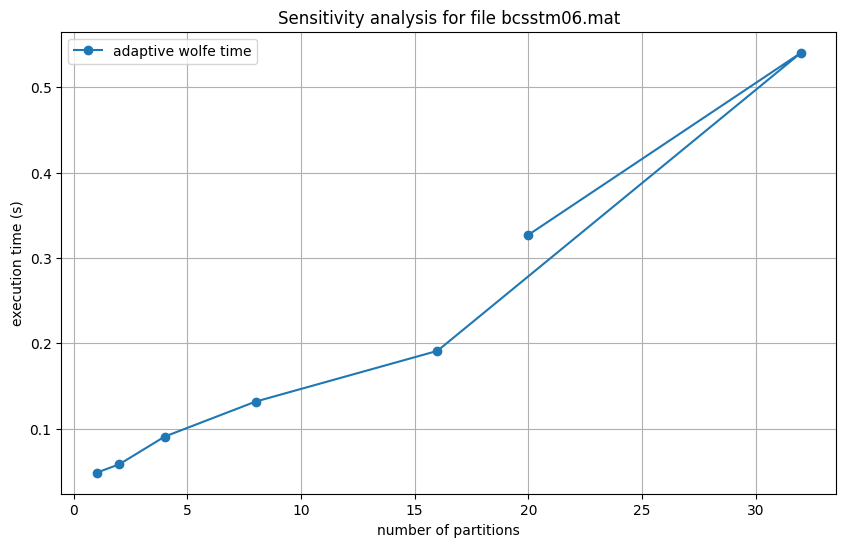

In [10]:
# test sensitivity to the number of partitions
initial=max(1, int(np.sqrt(n)))
partition_numbers = [1, 2, 4, 8, 16, 32,initial]
results_partition = test_sensitivity_to_partition(Q, q, max_iters, partition_numbers, tol)
# plot results
plot_partition_sensitivity(results_partition,f"Sensitivity analysis for file {file_name}")

## All Matrix

converged at iteration 2 with relative gap: 0.000000e+00
cvx_gap=[np.float64(0.0)]
converged at iteration 62 with relative gap: 2.757452e-14
CVXOPT Solver Time: 16.8196 s, f* = -1.6554e+00
wolfe Time: 1.0486 s, f* = 3.8541e-01
relative gap wolfe without format: 2.7574524588425295e-14
relative gap cvxopt without format: 0.0
File Name: 1138_bus.mat size : (1138, 1138)
CVXOPT Solver Time: 16.8196 s, f* = -1.6554e+00
wolfe Time: 1.0486202239990234 s, f* = 0.3854132548557241
relative gap wolfe without format: 2.7574524588425295e-14
relative gap cvxopt without format: 0.0


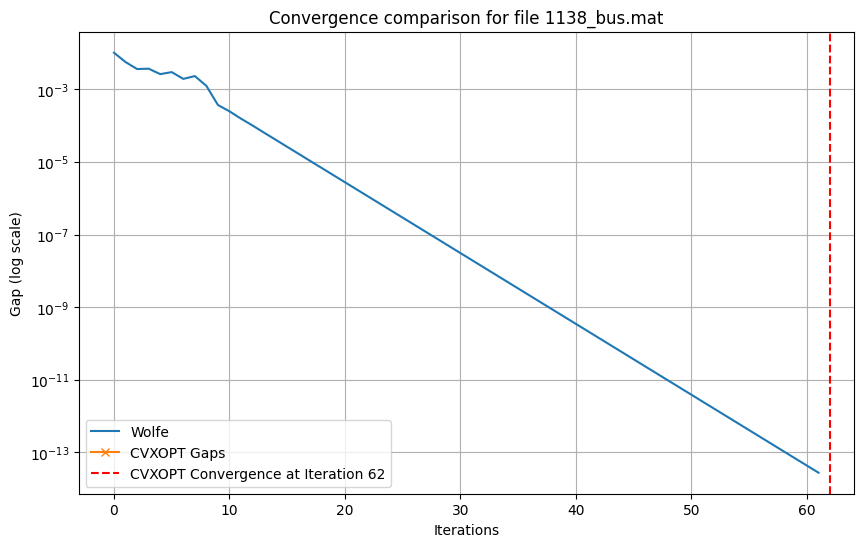

converged at iteration 67 with relative gap: 7.976967e-13
converged at iteration 59 with relative gap: 4.196294e-13
converged at iteration 45 with relative gap: 1.608160e-13
converged at iteration 107 with relative gap: 1.165949e-13
converged at iteration 67 with relative gap: 5.112629e-14
converged at iteration 127 with relative gap: 2.891546e-14
converged at iteration 63 with relative gap: 2.380250e-14


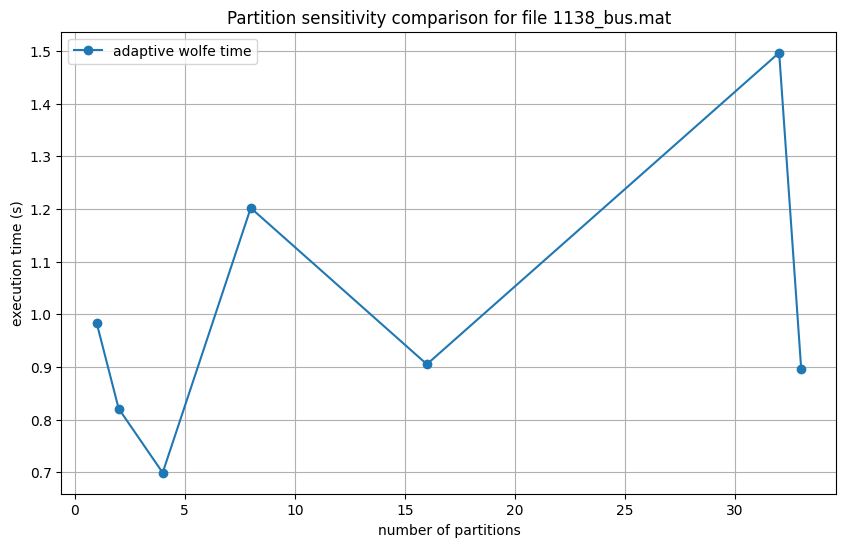

converged at iteration 20 with relative gap: 2.271380e-06
converged at iteration 19 with relative gap: 1.657508e-07
converged at iteration 65 with relative gap: 3.179260e-08
converged at iteration 30 with relative gap: 3.291837e-09
converged at iteration 73 with relative gap: 2.975255e-10
converged at iteration 41 with relative gap: 2.318751e-11
converged at iteration 69 with relative gap: 3.064643e-12
converged at iteration 35 with relative gap: 2.863517e-13
converged at iteration 68 with relative gap: 2.353594e-14
converged at iteration 51 with relative gap: 2.417787e-15


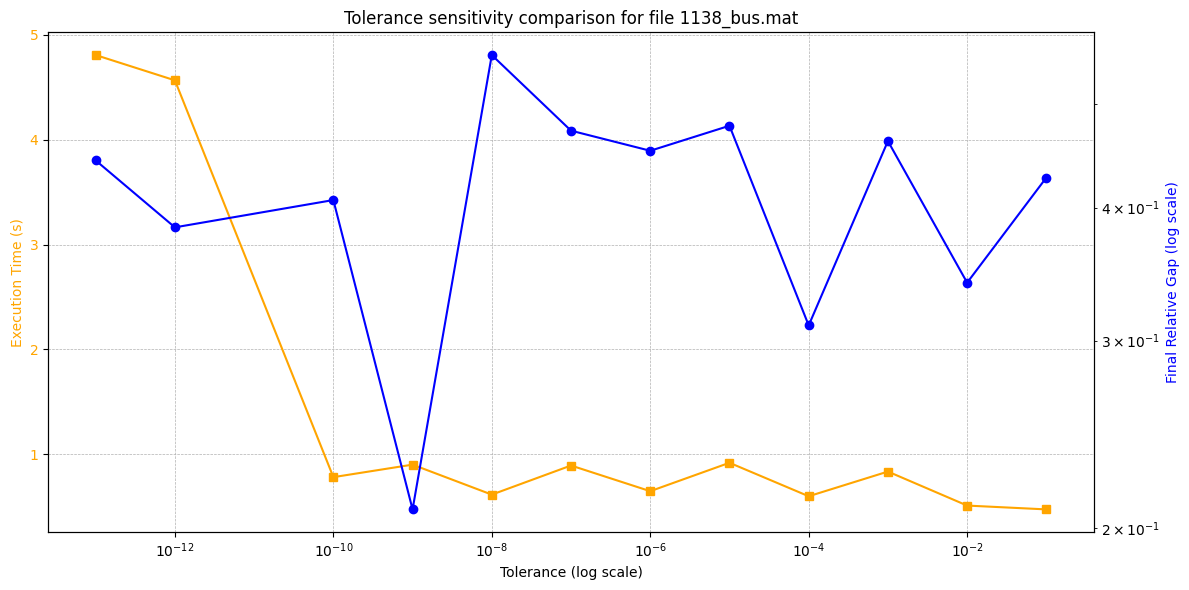

converged at iteration 2 with relative gap: 0.000000e+00
cvx_gap=[np.float64(0.0)]
converged at iteration 32 with relative gap: 3.008920e-14
CVXOPT Solver Time: 6.5020 s, f* = -1.5980e+00
wolfe Time: 0.1339 s, f* = 5.6872e-01
relative gap wolfe without format: 3.0089199902270427e-14
relative gap cvxopt without format: 0.0
File Name: 494_bus.mat size : (494, 494)
CVXOPT Solver Time: 6.5020 s, f* = -1.5980e+00
wolfe Time: 0.13390040397644043 s, f* = 0.568716877236187
relative gap wolfe without format: 3.0089199902270427e-14
relative gap cvxopt without format: 0.0


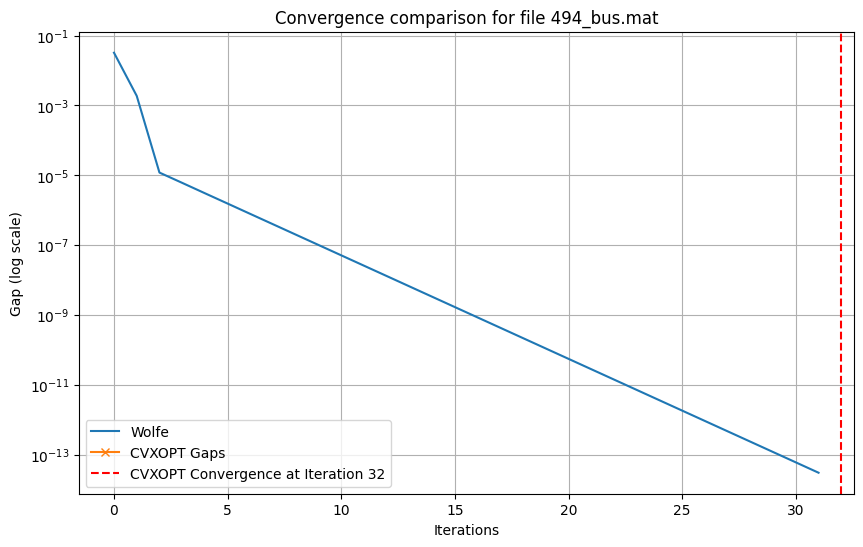

converged at iteration 112 with relative gap: 6.663097e-13
converged at iteration 61 with relative gap: 2.611187e-13
converged at iteration 233 with relative gap: 1.807762e-13
converged at iteration 147 with relative gap: 8.022616e-14
converged at iteration 70 with relative gap: 3.327171e-14
converged at iteration 78 with relative gap: 1.743432e-14
converged at iteration 41 with relative gap: 2.322279e-14


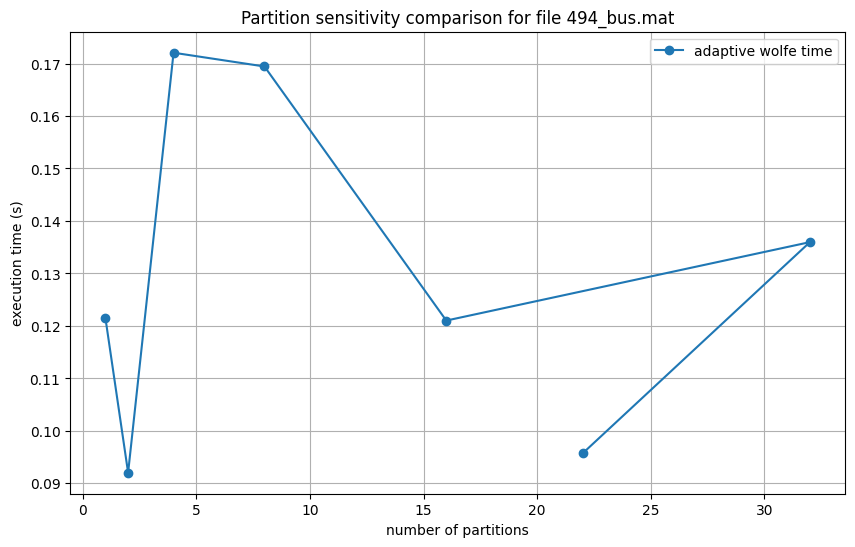

converged at iteration 23 with relative gap: 2.923395e-06
converged at iteration 22 with relative gap: 1.687522e-07
converged at iteration 32 with relative gap: 2.885453e-08
converged at iteration 36 with relative gap: 2.920156e-09
converged at iteration 41 with relative gap: 2.787749e-10
converged at iteration 35 with relative gap: 1.918773e-11
converged at iteration 83 with relative gap: 3.335701e-12
converged at iteration 65 with relative gap: 3.313116e-13
converged at iteration 273 with relative gap: 3.310097e-14
converged at iteration 39 with relative gap: 3.106738e-15


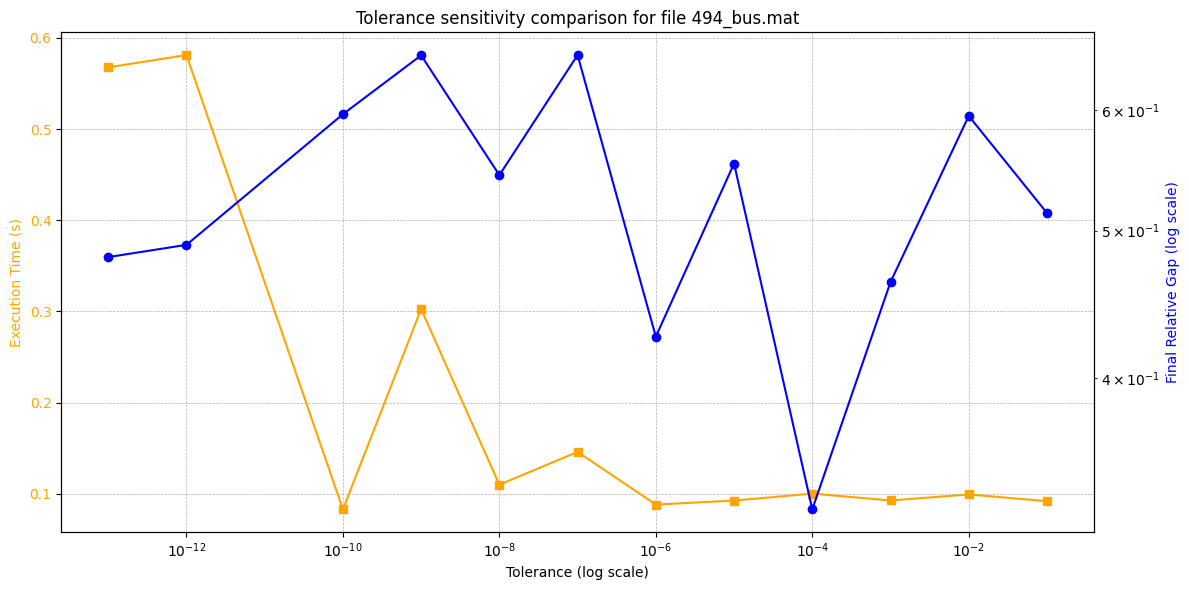

converged at iteration 2 with relative gap: 0.000000e+00
cvx_gap=[np.float64(0.0)]
converged at iteration 34 with relative gap: 1.311747e-13
CVXOPT Solver Time: 6.4972 s, f* = -1.6715e+00
wolfe Time: 0.2194 s, f* = 5.1168e-01
relative gap wolfe without format: 1.3117466653005393e-13
relative gap cvxopt without format: 0.0
File Name: 662_bus.mat size : (662, 662)
CVXOPT Solver Time: 6.4972 s, f* = -1.6715e+00
wolfe Time: 0.2193889617919922 s, f* = 0.5116828440852649
relative gap wolfe without format: 1.3117466653005393e-13
relative gap cvxopt without format: 0.0


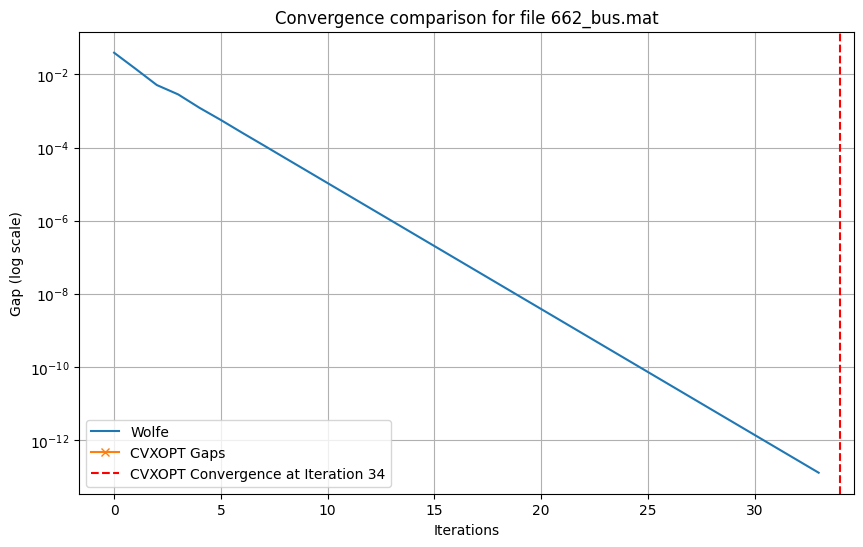

converged at iteration 158 with relative gap: 3.019105e-12
converged at iteration 338 with relative gap: 2.377467e-12
converged at iteration 122 with relative gap: 1.525047e-12
converged at iteration 132 with relative gap: 7.530421e-13
converged at iteration 106 with relative gap: 3.925918e-13
converged at iteration 14 with relative gap: 9.778865e-14
converged at iteration 34 with relative gap: 2.224763e-13


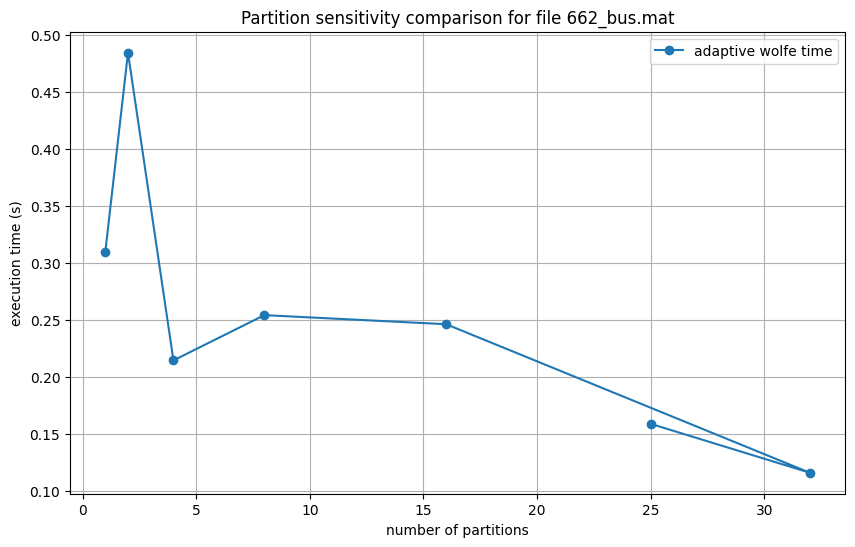

converged at iteration 12 with relative gap: 1.969358e-05
converged at iteration 22 with relative gap: 2.474103e-06
converged at iteration 23 with relative gap: 2.006879e-07
converged at iteration 26 with relative gap: 1.840738e-08
converged at iteration 23 with relative gap: 1.262127e-09
converged at iteration 70 with relative gap: 2.285273e-10
converged at iteration 57 with relative gap: 2.112331e-11
converged at iteration 78 with relative gap: 2.205673e-12
converged at iteration 58 with relative gap: 1.819159e-13
converged at iteration 53 with relative gap: 2.043465e-14
converged at iteration 73 with relative gap: 2.176468e-16


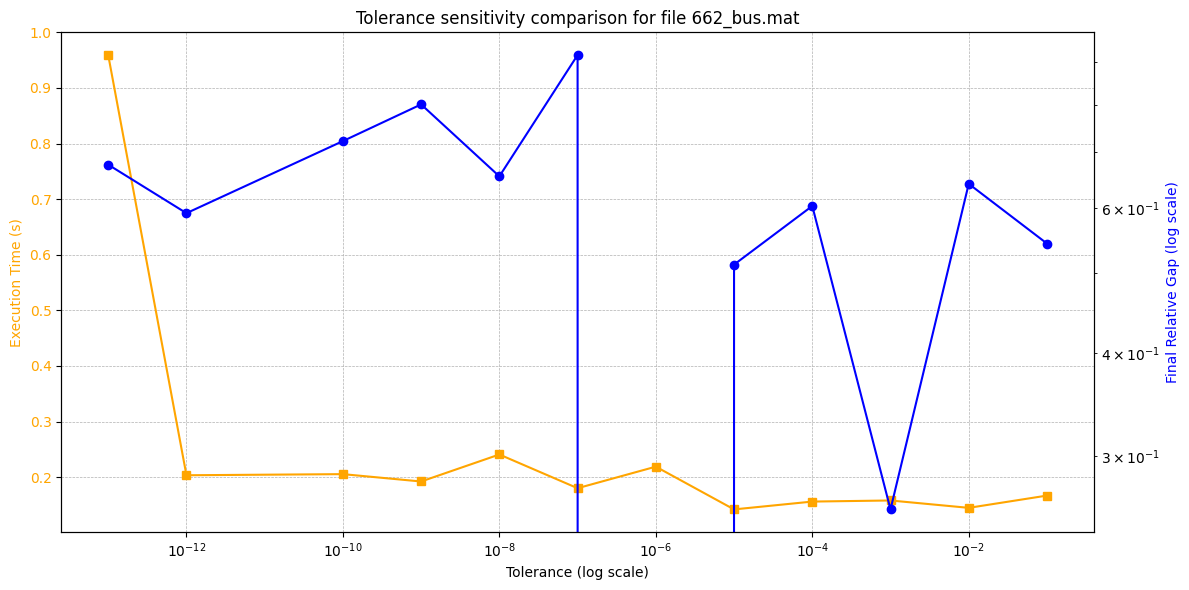

converged at iteration 2 with relative gap: 0.000000e+00
cvx_gap=[np.float64(0.0)]
converged at iteration 33 with relative gap: 2.091634e-14
CVXOPT Solver Time: 8.7348 s, f* = -1.3345e+00
wolfe Time: 0.2560 s, f* = 2.2340e+00
relative gap wolfe without format: 2.0916337224448977e-14
relative gap cvxopt without format: 0.0
File Name: 685_bus.mat size : (685, 685)
CVXOPT Solver Time: 8.7348 s, f* = -1.3345e+00
wolfe Time: 0.25596189498901367 s, f* = 2.2339529294043325
relative gap wolfe without format: 2.0916337224448977e-14
relative gap cvxopt without format: 0.0


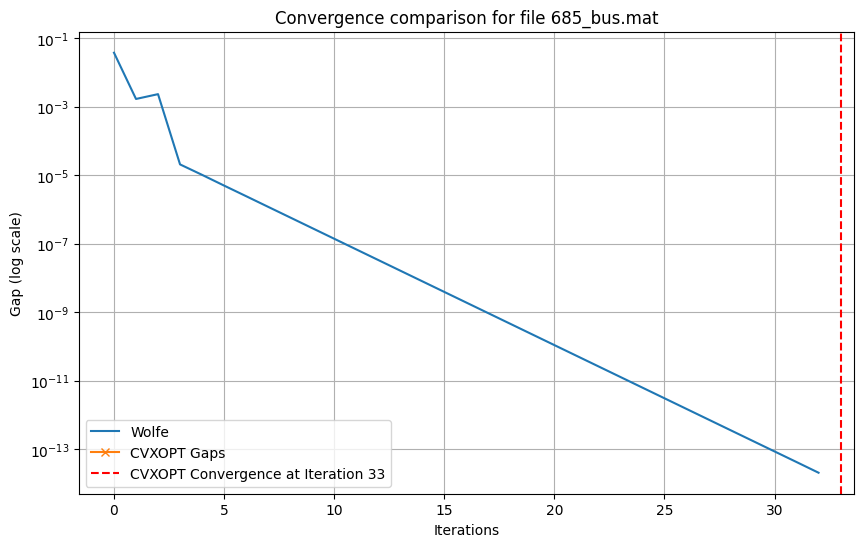

converged at iteration 366 with relative gap: 9.564983e-13
converged at iteration 229 with relative gap: 4.684036e-13
converged at iteration 169 with relative gap: 2.109294e-13
converged at iteration 158 with relative gap: 1.146921e-13
converged at iteration 62 with relative gap: 6.171184e-14
converged at iteration 45 with relative gap: 2.952696e-14
converged at iteration 89 with relative gap: 3.526022e-14


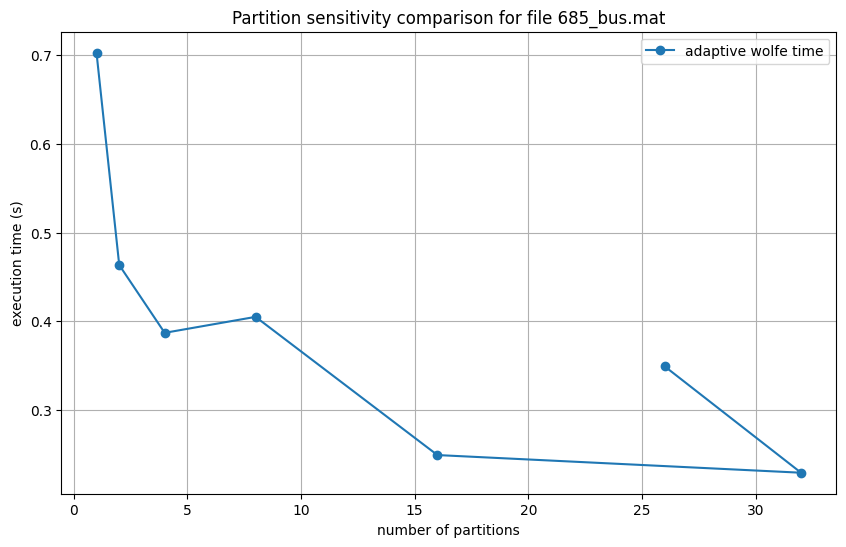

converged at iteration 19 with relative gap: 3.170496e-06
converged at iteration 22 with relative gap: 2.617883e-07
converged at iteration 16 with relative gap: 1.686190e-08
converged at iteration 40 with relative gap: 3.768863e-09
converged at iteration 17 with relative gap: 2.064753e-10
converged at iteration 14 with relative gap: 2.373782e-11
converged at iteration 59 with relative gap: 2.817900e-12
converged at iteration 11 with relative gap: 7.429683e-14
converged at iteration 25 with relative gap: 3.504734e-14
converged at iteration 19 with relative gap: 1.672663e-15


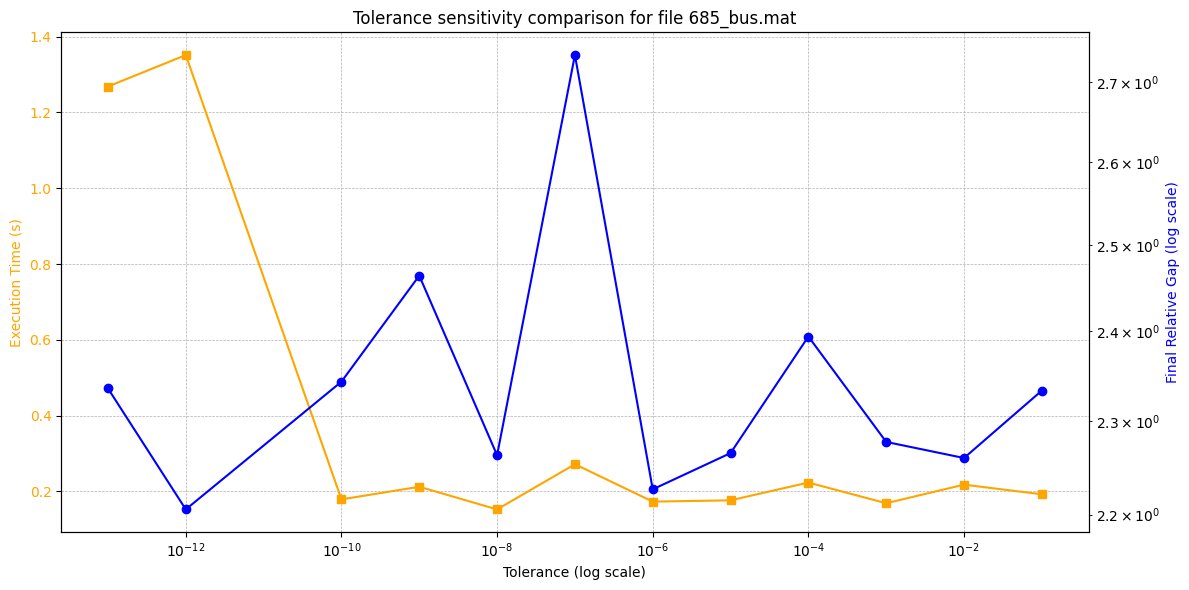

converged at iteration 2 with relative gap: 0.000000e+00
cvx_gap=[np.float64(0.0)]
converged at iteration 5 with relative gap: 0.000000e+00
CVXOPT Solver Time: 0.6720 s, f* = -2.3352e+00
wolfe Time: 0.0044 s, f* = 2.5133e+01
relative gap wolfe without format: 0.0
relative gap cvxopt without format: 0.0
File Name: bcsstm05.mat size : (153, 153)
CVXOPT Solver Time: 0.6720 s, f* = -2.3352e+00
wolfe Time: 0.004374027252197266 s, f* = 25.133259742693205
relative gap wolfe without format: 0.0
relative gap cvxopt without format: 0.0


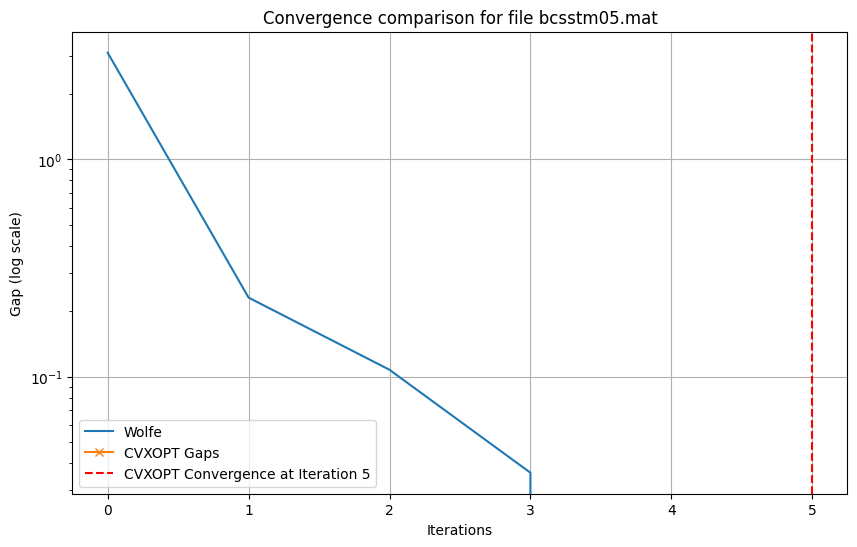

converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 4 with relative gap: 0.000000e+00
converged at iteration 4 with relative gap: 0.000000e+00
converged at iteration 5 with relative gap: 0.000000e+00
converged at iteration 3 with relative gap: 0.000000e+00
converged at iteration 5 with relative gap: 0.000000e+00
converged at iteration 5 with relative gap: 0.000000e+00


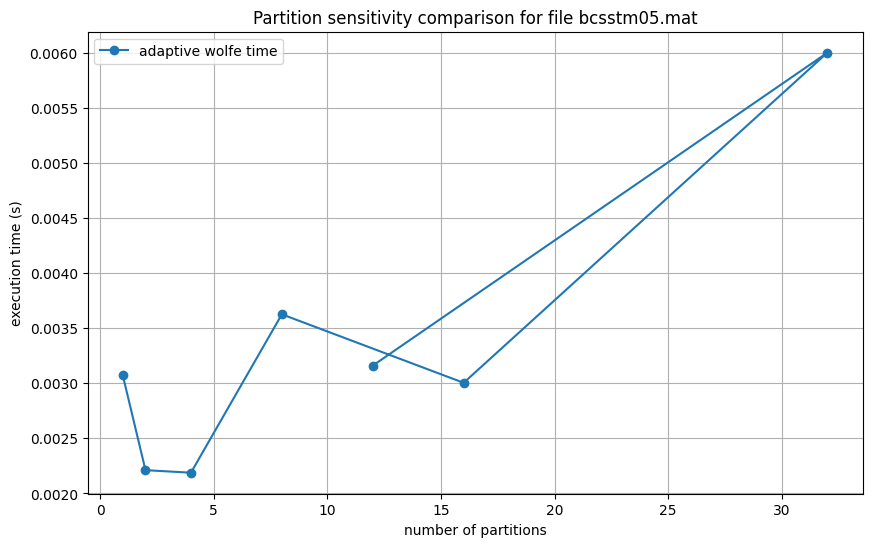

converged at iteration 5 with relative gap: 2.398995e-03
converged at iteration 5 with relative gap: 0.000000e+00
converged at iteration 5 with relative gap: 0.000000e+00
converged at iteration 7 with relative gap: 0.000000e+00
converged at iteration 5 with relative gap: 0.000000e+00
converged at iteration 4 with relative gap: 0.000000e+00
converged at iteration 6 with relative gap: 0.000000e+00
converged at iteration 4 with relative gap: 0.000000e+00
converged at iteration 6 with relative gap: 0.000000e+00
converged at iteration 4 with relative gap: 0.000000e+00
converged at iteration 4 with relative gap: 0.000000e+00
converged at iteration 5 with relative gap: 0.000000e+00


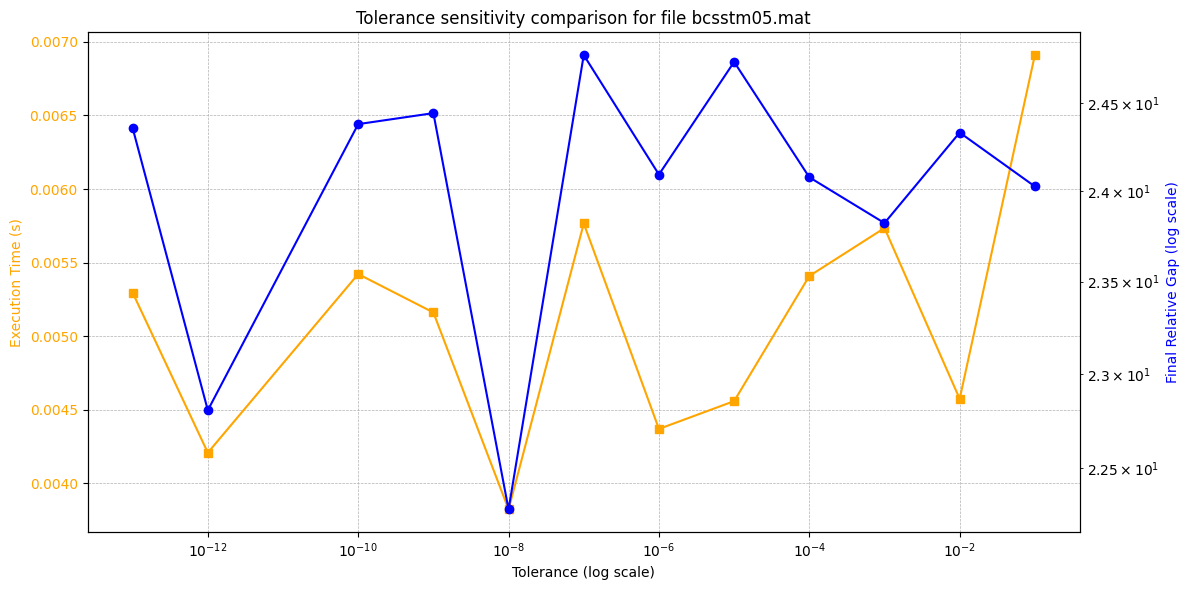

converged at iteration 2 with relative gap: 0.000000e+00
cvx_gap=[np.float64(0.0)]
CVXOPT Solver Time: 3.3057 s, f* = -1.9507e+00
wolfe Time: 0.5202 s, f* = -5.6186e-01
relative gap wolfe without format: 2.1140838866111783e-12
relative gap cvxopt without format: 0.0
File Name: bcsstm06.mat size : (420, 420)
CVXOPT Solver Time: 3.3057 s, f* = -1.9507e+00
wolfe Time: 0.5201799869537354 s, f* = -0.561855227613484
relative gap wolfe without format: 2.1140838866111783e-12
relative gap cvxopt without format: 0.0


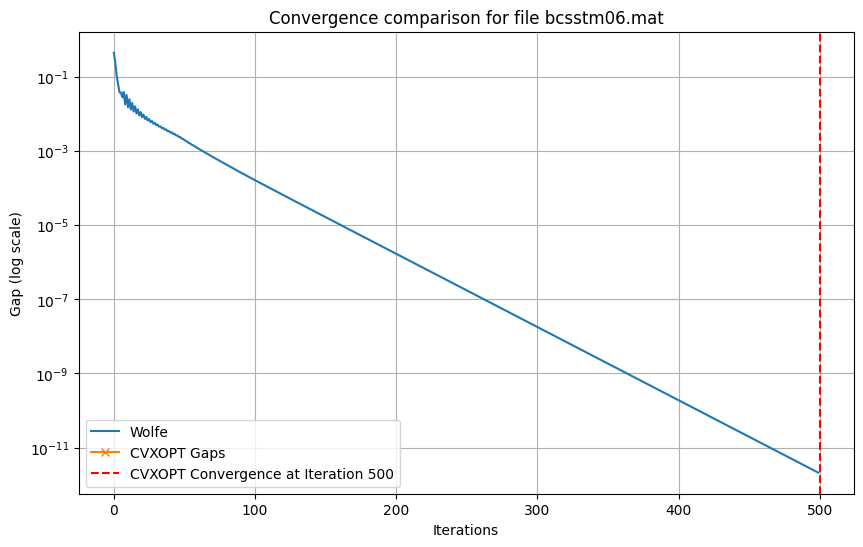

converged at iteration 11 with relative gap: 6.726727e-13
converged at iteration 45 with relative gap: 6.133902e-13
converged at iteration 98 with relative gap: 4.732883e-13
converged at iteration 101 with relative gap: 2.281292e-13
converged at iteration 219 with relative gap: 1.113871e-13
converged at iteration 361 with relative gap: 8.391850e-14


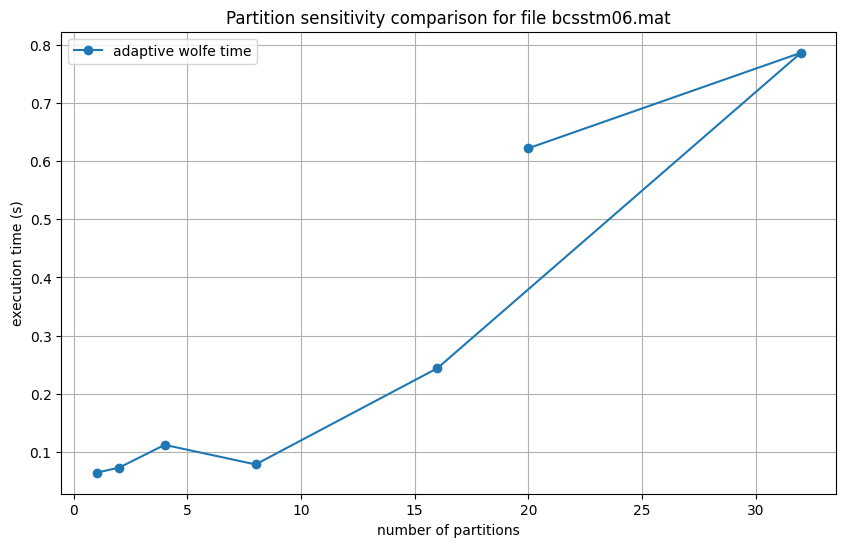

converged at iteration 65 with relative gap: 8.199067e-06
converged at iteration 93 with relative gap: 9.021619e-07
converged at iteration 139 with relative gap: 8.460378e-08
converged at iteration 135 with relative gap: 8.343896e-09
converged at iteration 197 with relative gap: 8.951538e-10
converged at iteration 170 with relative gap: 8.271804e-11
converged at iteration 176 with relative gap: 8.384465e-12
converged at iteration 283 with relative gap: 8.674452e-13
converged at iteration 311 with relative gap: 9.129859e-14
converged at iteration 347 with relative gap: 8.816706e-15
converged at iteration 324 with relative gap: 6.626471e-17


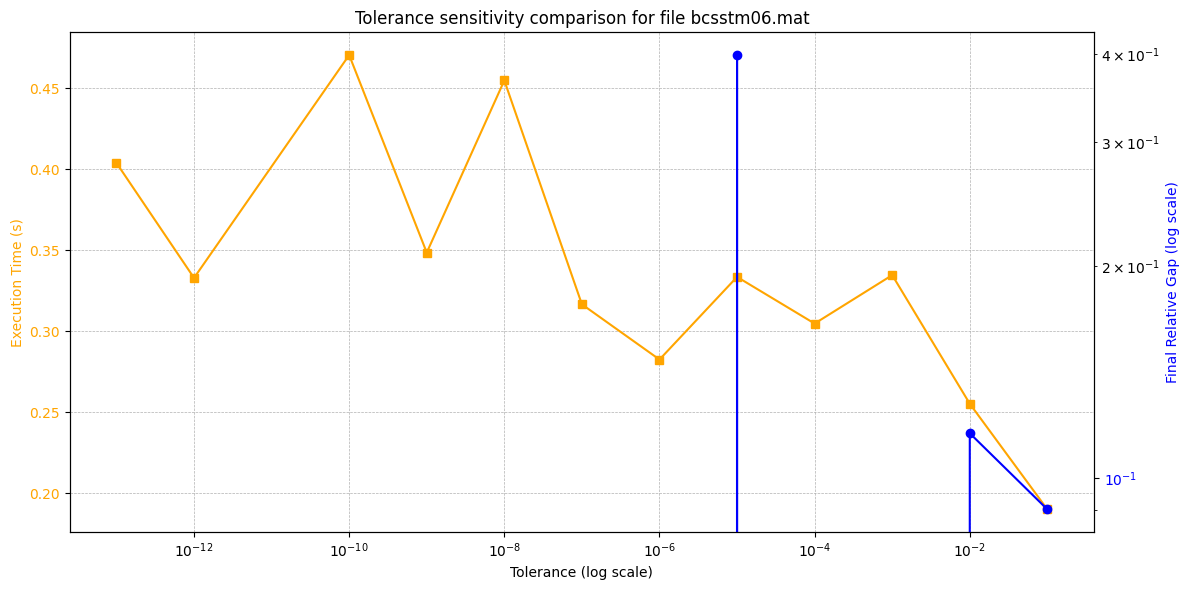

converged at iteration 2 with relative gap: 0.000000e+00
cvx_gap=[np.float64(0.0)]
CVXOPT Solver Time: 3.9910 s, f* = -2.2619e+00
wolfe Time: 0.5410 s, f* = -3.1403e+00
relative gap wolfe without format: 6.491708211698681e-09
relative gap cvxopt without format: 0.0
File Name: bcsstm07.mat size : (420, 420)
CVXOPT Solver Time: 3.9910 s, f* = -2.2619e+00
wolfe Time: 0.5410151481628418 s, f* = -3.1403379248576755
relative gap wolfe without format: 6.491708211698681e-09
relative gap cvxopt without format: 0.0


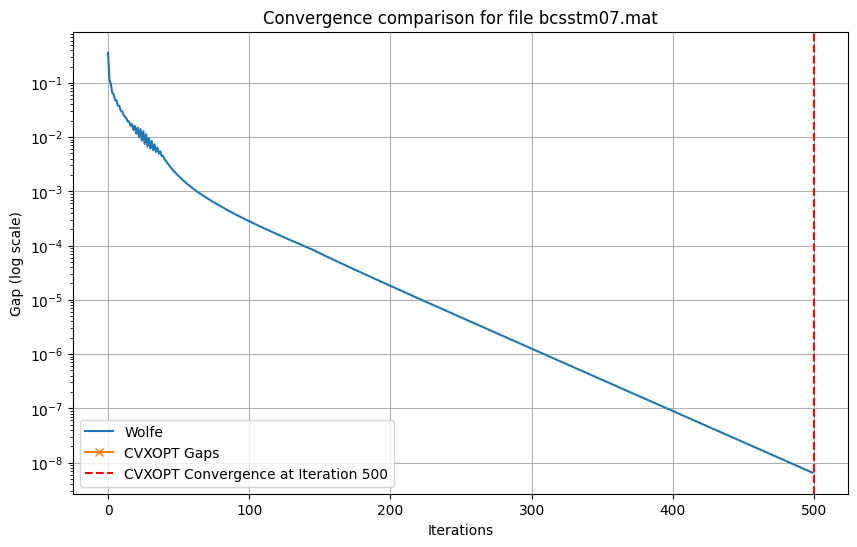

converged at iteration 15 with relative gap: 1.593392e-12
converged at iteration 12 with relative gap: 3.763310e-12
converged at iteration 19 with relative gap: 6.963745e-13
converged at iteration 42 with relative gap: 5.290386e-13
converged at iteration 272 with relative gap: 3.649356e-13


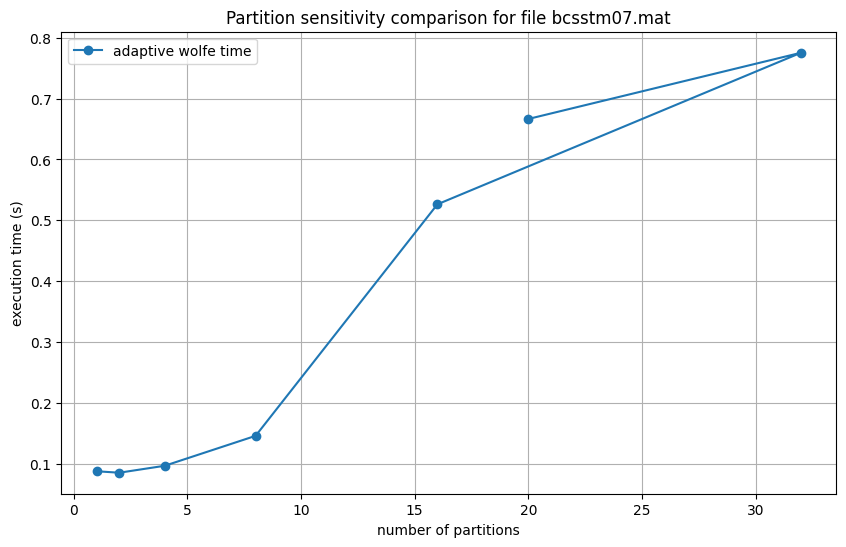

converged at iteration 118 with relative gap: 2.839805e-05
converged at iteration 268 with relative gap: 2.825684e-07


e:\GitHub\Nazifa_Mosharrat_CM_Project\CMProject\visualization.py:56: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2.set_yscale('log')


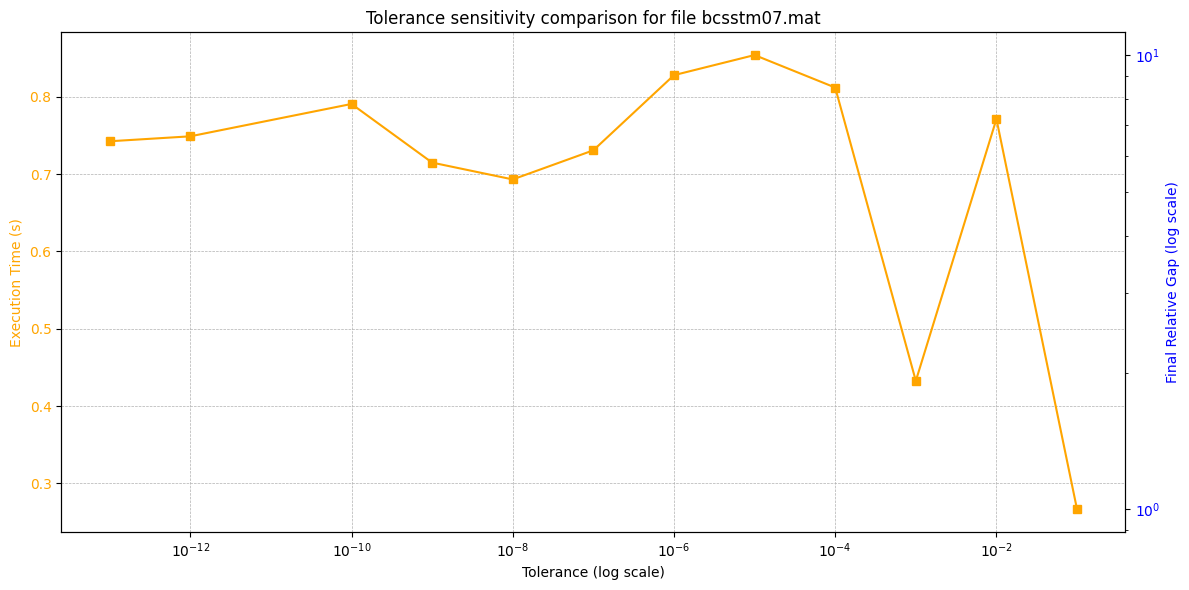

converged at iteration 2 with relative gap: 0.000000e+00
cvx_gap=[np.float64(0.0)]
converged at iteration 2 with relative gap: 0.000000e+00
CVXOPT Solver Time: 12.2983 s, f* = -2.8768e+00
wolfe Time: 0.3888 s, f* = 6.9225e+01
relative gap wolfe without format: 0.0
relative gap cvxopt without format: 0.0
File Name: bcsstm09.mat size : (1083, 1083)
CVXOPT Solver Time: 12.2983 s, f* = -2.8768e+00
wolfe Time: 0.38877391815185547 s, f* = 69.22501562516983
relative gap wolfe without format: 0.0
relative gap cvxopt without format: 0.0


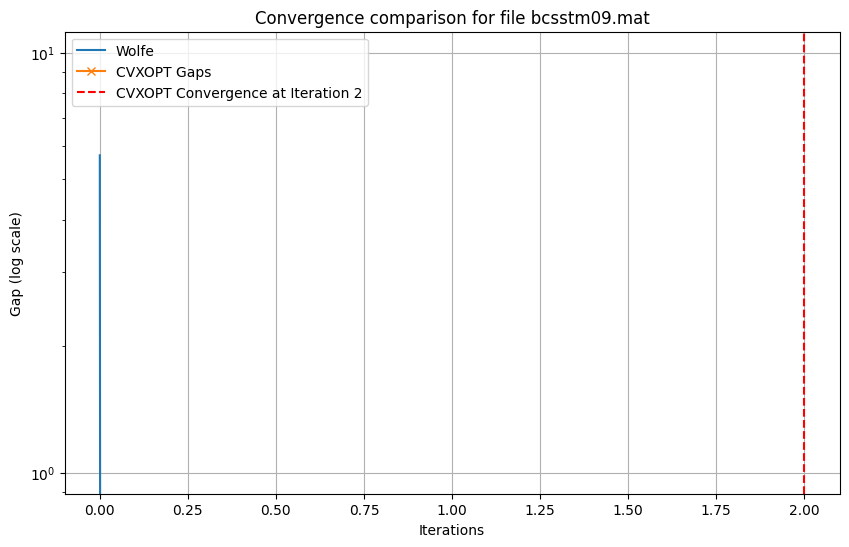

converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00


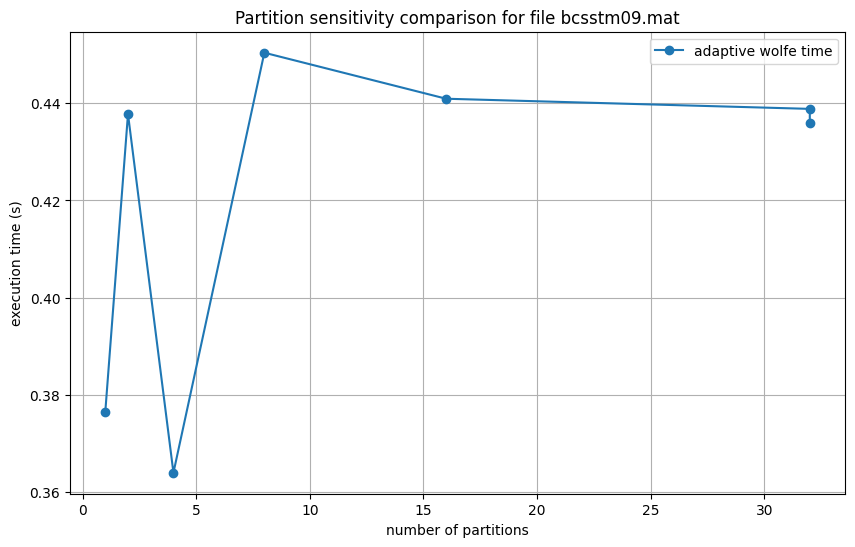

converged at iteration 1 with relative gap: 5.698299e+00
converged at iteration 1 with relative gap: 5.698299e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00
converged at iteration 2 with relative gap: 0.000000e+00


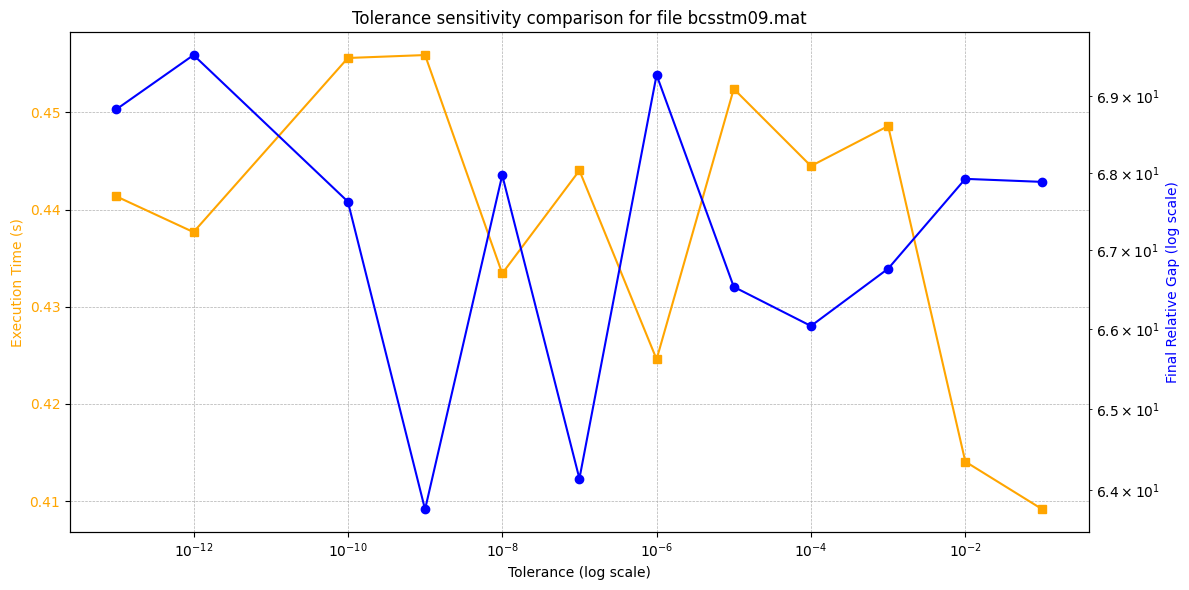

In [11]:
from main import main

main(folder_path)